In [50]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

from manoFunkcijos import *

In [ ]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""paste SQL command here!"""
C.execute(sql)
ans = C.fetchall()
? = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [4]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select lytis, count(*),
avg(bdu_spalio)
from DUS2014N
group by lytis;
"""
C.execute(sql)
ans = C.fetchall()
lytis, kiekis, atlyginimas = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [7]:
atlyginimas[0]

2097.3796584100805

In [16]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select *, C/(select count(*) from sa)*100 as '%' from
(select * from
(select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T1
union all
select 'Others', count(*) as C
from sa
where device_brand not in
(select B from (select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T2)) as T3;"""
C.execute(sql)
ans = C.fetchall()
gamintojai, kiekiai, dalis = list(map(list, zip(*ans)))

In [9]:
pout(ans)

Rodoma 5 eilutės iš 6
| 0 |    Samsung     |     36290      |    30.4927     |
| 1 |     Nokia      |     35186      |    29.5651     |
| 2 |   BlackBerry   |      7161      |     6.0170     |
| 3 |       LG       |      5194      |     4.3643     |
| 4 |  SonyEricsson  |      4090      |     3.4366     |


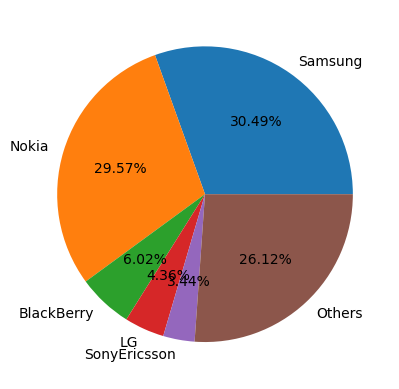

In [12]:
fig, axis = plt.subplots()

axis.pie(kiekiai, labels = gamintojai, autopct='%.2f%%')
plt.show()

In [29]:
sql="""SELECT 
case
when amzius='14-19' or amzius = '20-29' then '14-29'
else amzius
end as amziusN,
count(*) as Kiekis2014 FROM DUS2014N
where lytis ='M'
group by amziusN
order by amziusN asc;"""
C.execute(sql)
ans14M = C.fetchall()
amzius14M, kiekis14M = list(map(list, zip(*ans14M)))

sql="""SELECT 
case
when amzius='14-19' or amzius = '20-29' then '14-29'
else amzius
end as amziusN,
count(*) as Kiekis2014 FROM DUS2014N
where lytis ='F'
group by amziusN
order by amziusN asc;"""
C.execute(sql)
ans14F = C.fetchall()
amzius14F, kiekis14F = list(map(list, zip(*ans14F)))

sql="""select amzius, count(*) from DUS2018N
where lytis ='M'
group by amzius;"""
C.execute(sql)
ans18M = C.fetchall()
amzius18M, kiekis18M = list(map(list, zip(*ans18M)))

sql="""select amzius, count(*) from DUS2018N
where lytis = 'F'
group by amzius;"""
C.execute(sql)
ans18F = C.fetchall()
amzius18F, kiekis18F = list(map(list, zip(*ans18F)))


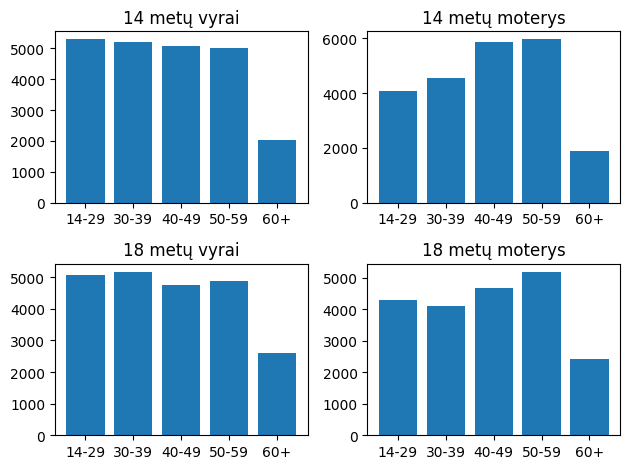

In [30]:
fig, axis = plt.subplots(2,2)

axis[0][0].bar(amzius14M, kiekis14M)
axis[0][1].bar(amzius14F, kiekis14F)
axis[1][0].bar(amzius18M, kiekis18M)
axis[1][1].bar(amzius18F, kiekis18F)

axis[0][0].set_title('14 metų vyrai')
axis[0][1].set_title('14 metų moterys')
axis[1][0].set_title('18 metų vyrai')
axis[1][1].set_title('18 metų moterys')

fig.tight_layout()

plt.show()

TypeError: 'Axes' object is not subscriptable

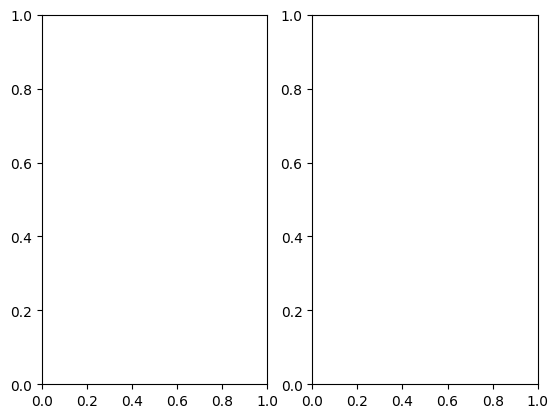

In [35]:
sql="""select amzius, count(*), avg(bdu_spalio) from DUS2018N
where lytis='M'
group by amzius;"""
C.execute(sql)
ans = C.fetchall()
amziusM, kiekisM, vidM = list(map(list, zip(*ans)))

sql="""select amzius, count(*), avg(bdu_spalio) from DUS2018N
where lytis='F'
group by amzius;"""
C.execute(sql)
ans = C.fetchall()
amziusF, kiekisF, vidF = list(map(list, zip(*ans)))




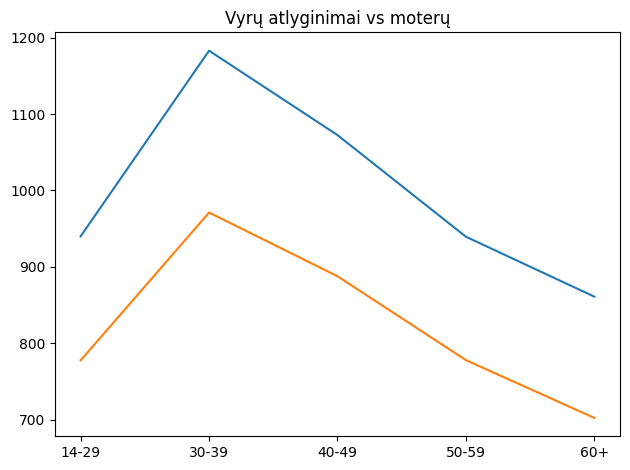

In [39]:

fig, axis = plt.subplots()

axis.plot(amziusM, vidM)
axis.plot(amziusF, vidF)


axis.set_title('Vyrų atlyginimai vs moterų')



fig.tight_layout()

plt.show()

In [41]:
sql="""SELECT gamintojas, count(*), avg(cast(replace(price, ' ', '') as decimal)) as kaina,
 avg(cast(replace(replace(rida, ' ', ''), 'km', '') as decimal)) as rida,
 avg(2024-substring(pagaminimo_data, 1, 4)) as amzius
 FROM works.autopliuslt
 where rida != 'Nenurodyta'
group by gamintojas
order by count(*) desc
limit 5;"""
C.execute(sql)
ans = C.fetchall()
gamintojas, kiekis, kaina, rida, amzius = list(map(list, zip(*ans)))

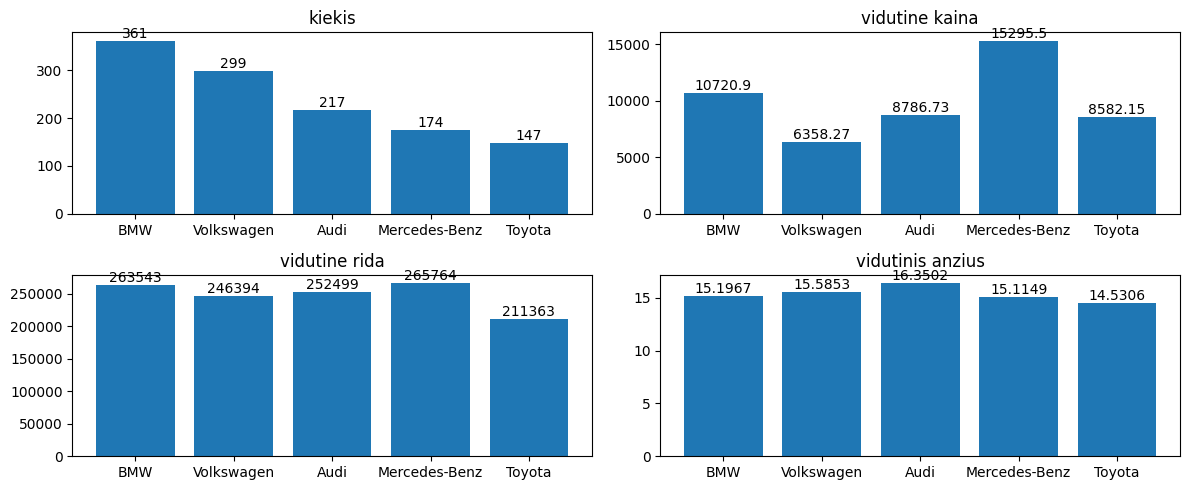

In [48]:
fig, axis = plt.subplots(2,2, figsize=(12, 5))

a=axis[0][0].bar(gamintojas, kiekis)
axis[0][0].bar_label(a)
a1=axis[0][1].bar(gamintojas, kaina)
axis[0][1].bar_label(a1)
a2=axis[1][0].bar(gamintojas, rida)
axis[1][0].bar_label(a2)
a3=axis[1][1].bar(gamintojas, amzius)
axis[1][1].bar_label(a3)

axis[0][0].set_title('kiekis')
axis[0][1].set_title('vidutine kaina')
axis[1][0].set_title('vidutine rida')
axis[1][1].set_title('vidutinis anzius')

fig.tight_layout()

plt.show()

In [51]:
sql="""SELECT round(avg(cast(replace(price, ' ', '') as decimal)), 0) as kaina,
2024-substring(pagaminimo_data, 1, 4) as amzius
FROM works.autopliuslt
group by amzius
order by amzius;"""
C.execute(sql)
ans = C.fetchall()
kaina, amzius = list(map(list, zip(*ans)))

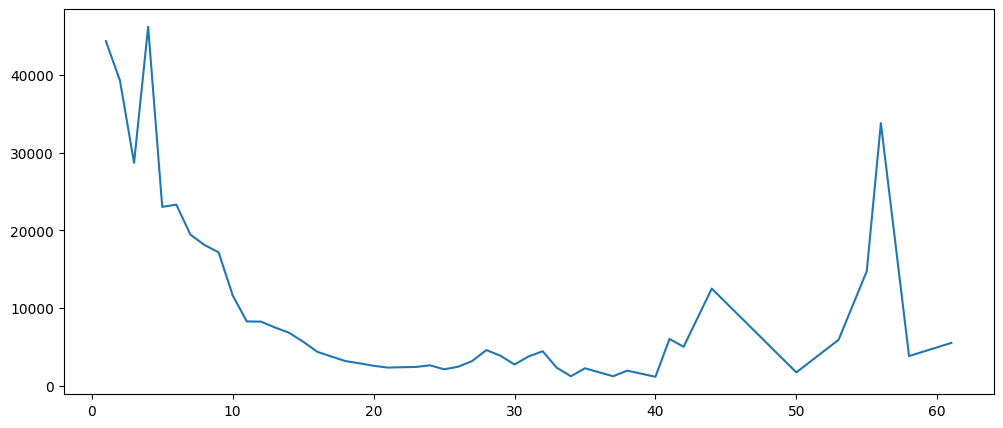

In [53]:
fig, axis = plt.subplots( figsize=(12, 5))

axis.plot(amzius, kaina)

plt.show()